In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as image
plt.rcParams["figure.figsize"] = (8, 8)

from simple_maze import SimpleMaze

# Pathfinding algorithms implementation

In [42]:
class BFS:
    def __init__(self, maze: SimpleMaze):
        self.maze = maze
        self.for_path = None
        self.start = self.maze.start
        self.exits = self.maze.exits
    
    directions = {0: [0, 1],
                  1: [0, -1],
                  2: [1, 0],
                  3: [-1, 0]}
    
    def find_path(self):
        start = list(self.start)[0]
        visited = set()
        q = [start]  # this is the queue (position)
        for_path = {start: None}
        while q:
            current_pos = q.pop(0)
            if current_pos in visited:
                continue
            # print(current_pos)
            x, y = current_pos
            to_add = []
            for delta in self.directions.values():
                x_, y_ = x + delta[0], y + delta[1]
                if (0 <= x_ < self.maze.WIDTH and 0 <= y_ < self.maze.HEIGHT) and (x_, y_) not in visited:
                    if self.maze.field[x_, y_] == 0:
                        to_add.append((x_, y_))
                        for_path[(x_, y_)] = current_pos
                    elif self.maze.field[x_, y_] == 3:
                        self.chosen_exit = (x_, y_)
                        for_path[(x_, y_)] = current_pos
                        self.for_path = for_path
                        return
            visited.add(current_pos)
            q.extend(to_add)
        print('[find_path function] There is no path')
        return
    
    def construct_path(self):
        if self.for_path is not None:
            path = []
            pos = self.chosen_exit
            start = self.start
            while pos is not None:
                path.append(pos)
                pos = self.for_path[pos]
            self.path = path[::-1]
            return

    def show_solution(self):
        if self.for_path is not None:
            self.maze.render(path=self.path)
        else:
            self.maze.render(path=None)

In [51]:
img = image.imread('tracks/track6.png')[:,:,:3]
maze = SimpleMaze(img)

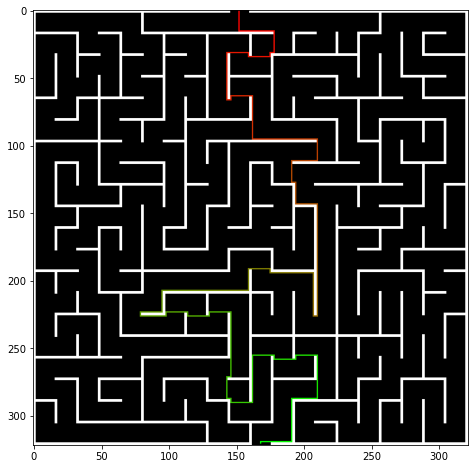

In [52]:
solver = BFS(maze)
solver.find_path()
solver.construct_path()
solver.show_solution()